### Student Name: - Dhaval Sunil Tharkar


### Project Name: - Bike Share Prediction Using Machine Learning.

### Data description

The business meaning of each column in the data is as below

season: The current season (1:winter, 2:spring, 3:summer, 4:fall)

yr: year (0: 2011, 1:2012)

mnth: month ( 1 to 12)

hr: hour of the day (0 to 23)

holiday: weather day is holiday or not

weekday: day of the week

workingday: if day is neither weekend nor holiday is 1, otherwise is 0

weathersit: The Weather forecast for the day

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius.

atemp: Normalized feeling temperature in Celsius.

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('hour.csv')

In [3]:
data.head() # Shows the first five rows of the data from variable data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01 January 2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01 January 2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01 January 2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01 January 2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01 January 2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.tail() # Shows the last five rows of the data from variable data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31 December 2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31 December 2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31 December 2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31 December 2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31 December 2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
data.shape # shows the shape of the data variable in tuple format
# variable_name(number of rows, number of columns)

(17379, 17)

In [6]:
data.info() # Print the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
data.describe() 
# shows the Statistical details like count, mean,standard deviation, minimum value, quartile 1 i.e. 25 %, quartile 2 
# i.e. median or 50 %, quartile 3 i.e. 75%, maximum value

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
data.isnull().any() # checking for the null values into the dataset

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [10]:
data.isna().any() # checking for the na values into the dataset

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [11]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 25 then the variable is likely to be a category otherwise continuous
data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
#Rename the columns
data.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [14]:
data.head()

,rec_id,datetime,season,year,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,01 January 2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01 January 2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01 January 2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01 January 2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01 January 2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
data['datetime']=pd.to_datetime(data.datetime)

data['season']=data.season.astype('category')
data['year']=data.year.astype('category')
data['month']=data.month.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weather_condition']=data.weather_condition.astype('category')

In [16]:
data.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hr                            int64
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [17]:
# Dropping Unnecessary Columns
data.drop('datetime',axis=1,inplace=True)
data.drop('rec_id',axis=1,inplace=True)
data.drop('year',axis=1,inplace=True)

In [18]:
data.head()

,season,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Correlation Matrix

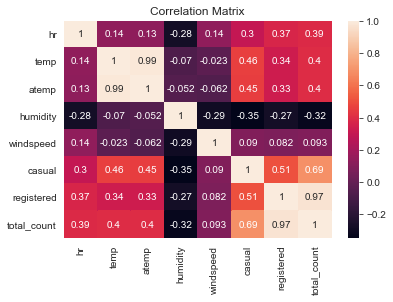

In [19]:
sns.set_style('darkgrid')
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix');

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

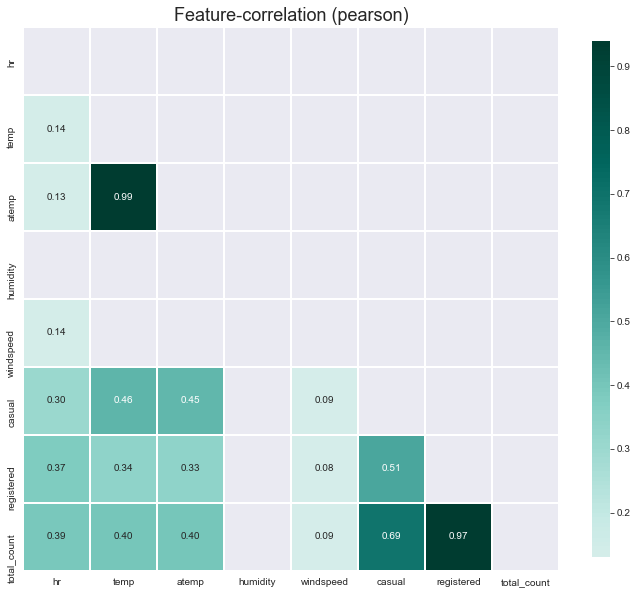

In [20]:
klib.corr_plot(data, split = 'pos') # displays only the positive correlation

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

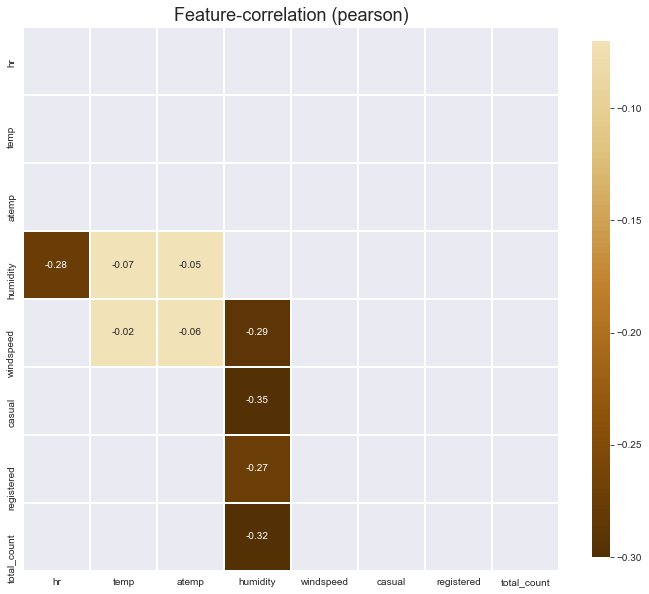

In [21]:
klib.corr_plot(data, split = 'neg') # displays only the negative correlation

array([[<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'total_count'}>, <AxesSubplot:>]],
      dtype=object)

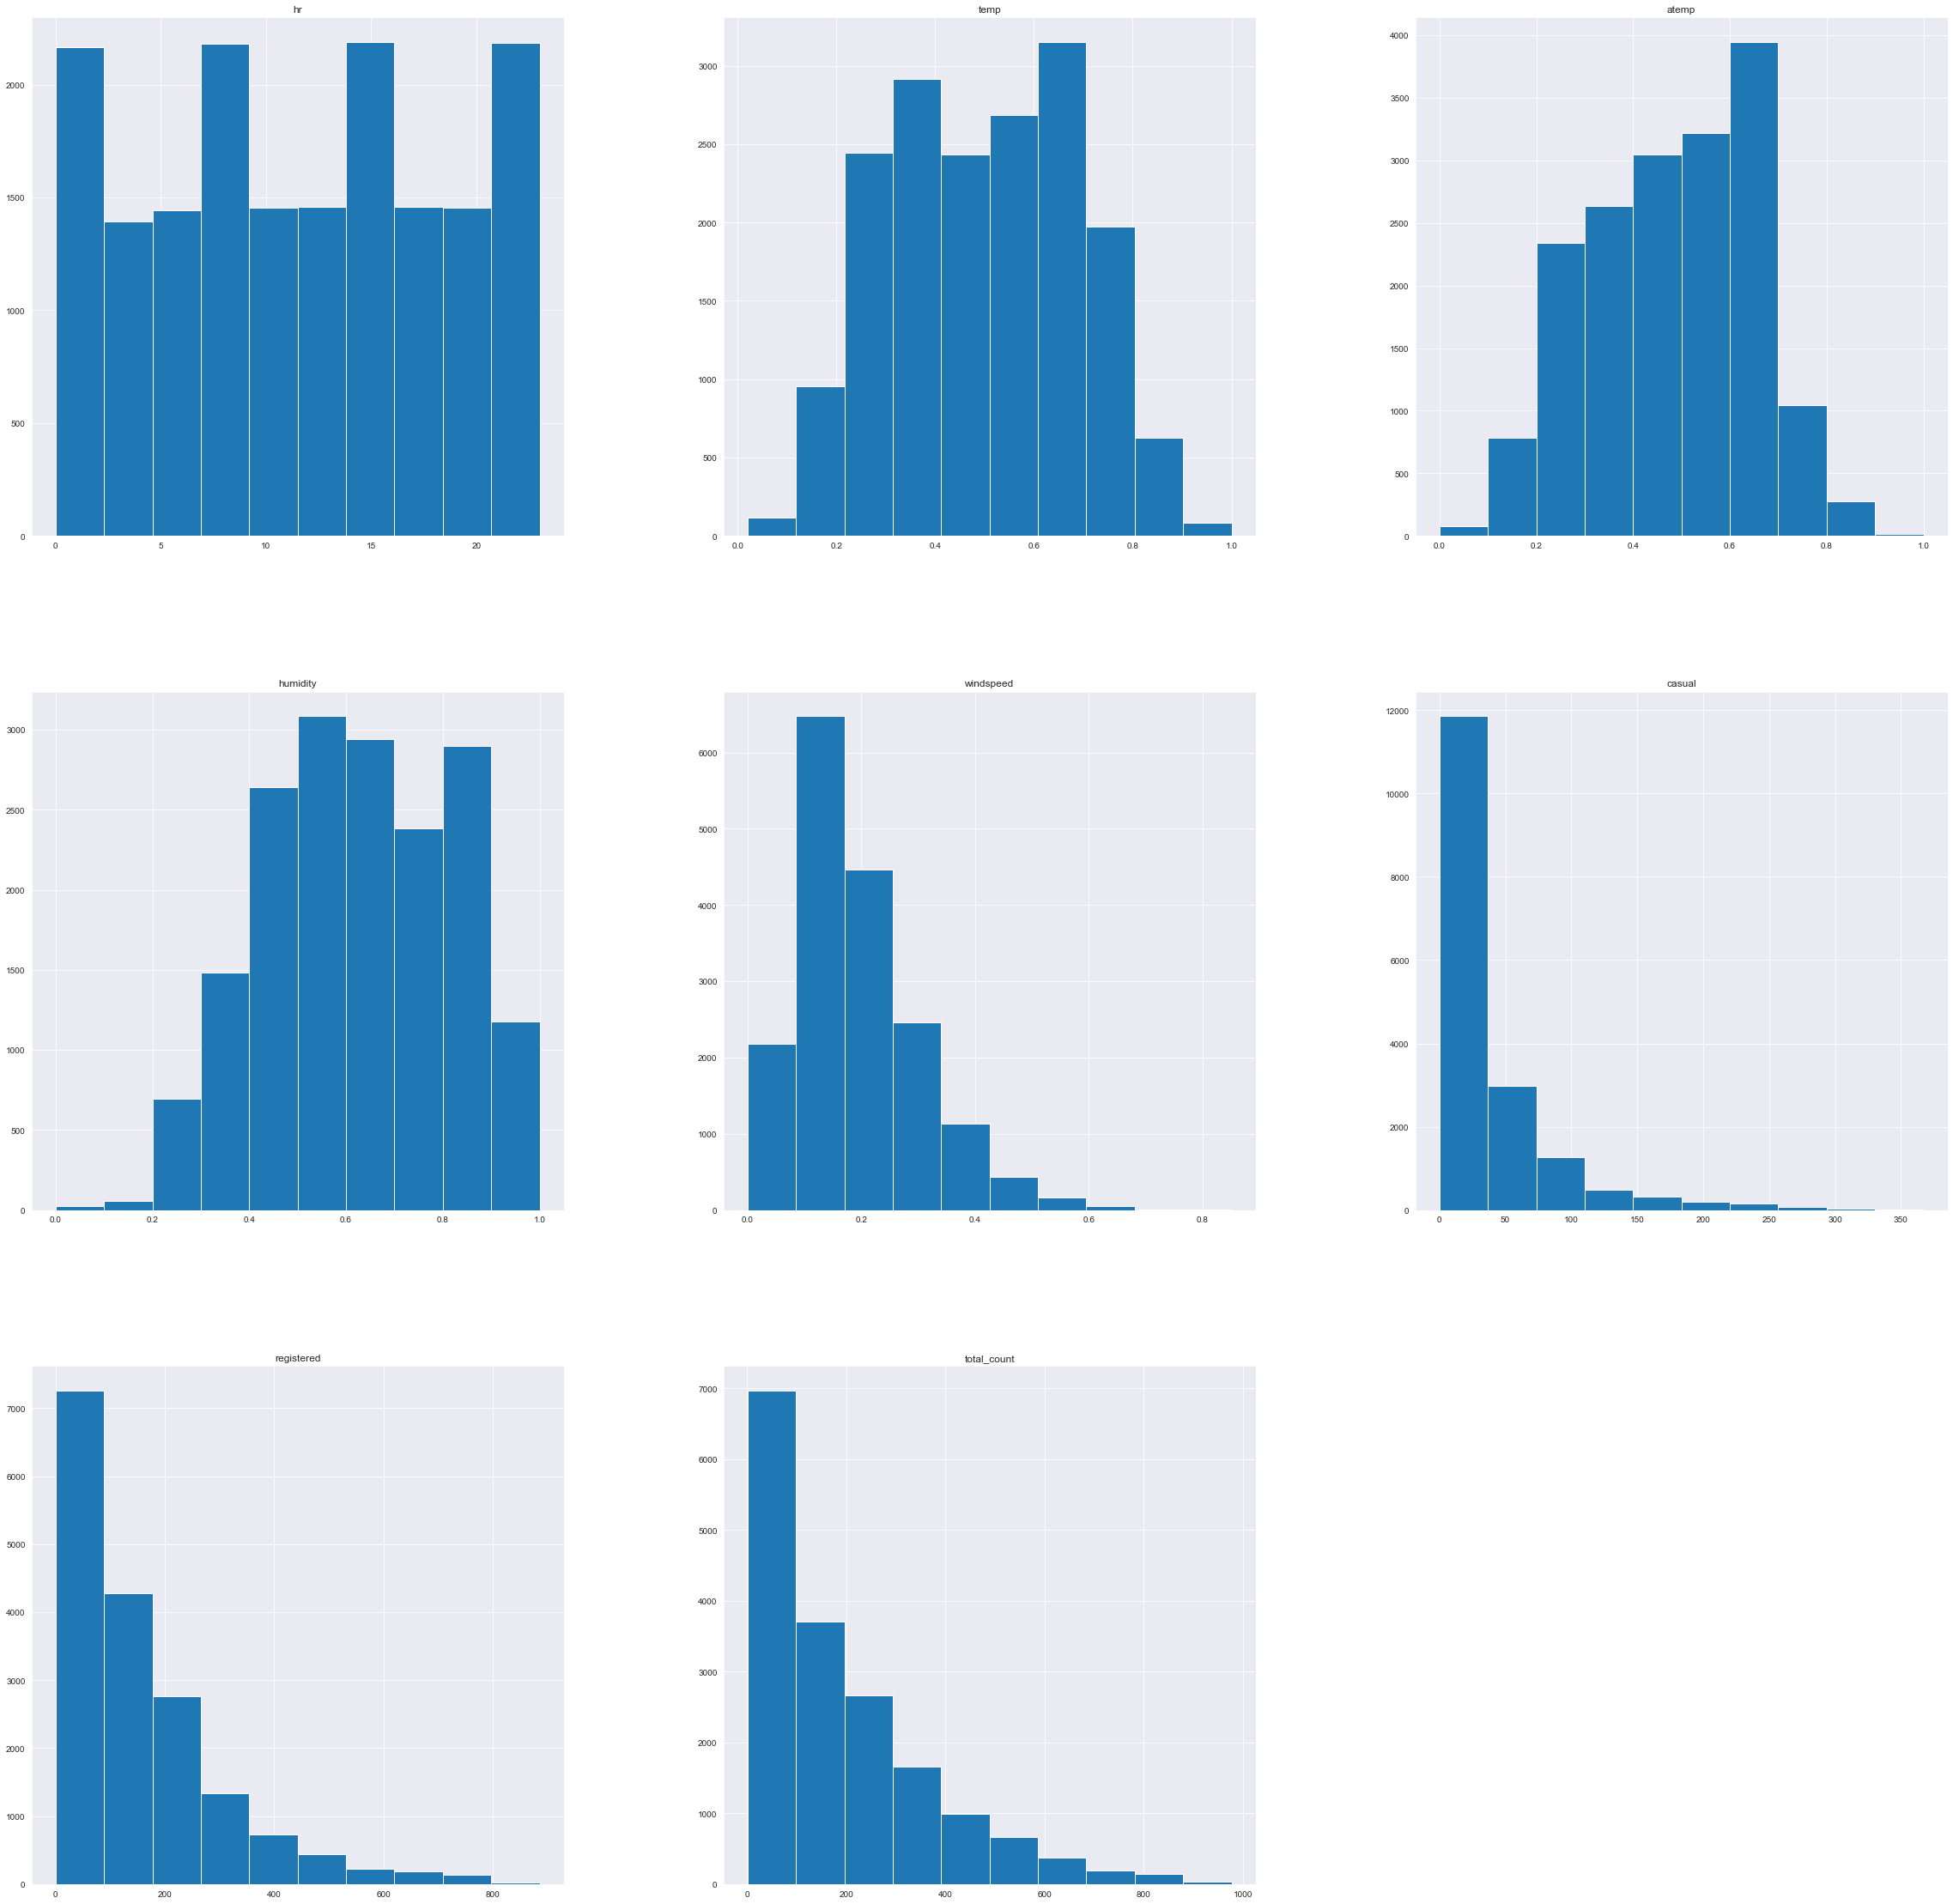

In [22]:
# creating histograms to visualize all the data
fig = plt.figure(figsize = (40,40))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
data.hist(ax = ax)

In [23]:
X = data.iloc[:, :13]

y = data.iloc[:, -1]

<AxesSubplot:xlabel='total_count'>

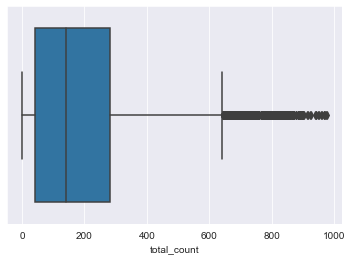

In [24]:
sns.boxplot(x=data["total_count"])

<AxesSubplot:xlabel='month', ylabel='total_count'>

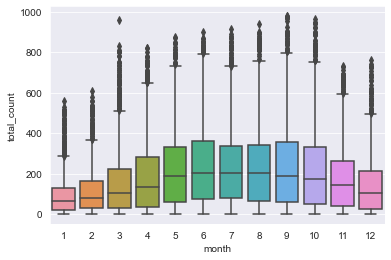

In [25]:
sns.boxplot(x="month", y="total_count", data=data)

<AxesSubplot:xlabel='hr', ylabel='total_count'>

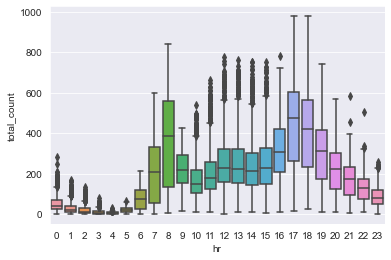

In [26]:
sns.boxplot(x="hr", y="total_count", data=data)

<AxesSubplot:xlabel='weather_condition', ylabel='total_count'>

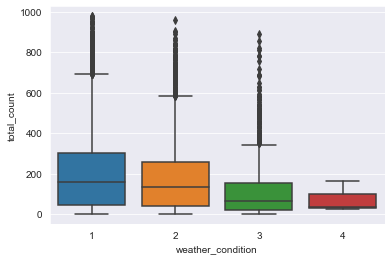

In [27]:
sns.boxplot(x="weather_condition", y="total_count", data=data)

<AxesSubplot:xlabel='workingday', ylabel='total_count'>

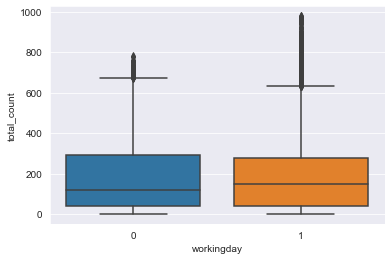

In [28]:
sns.boxplot(x="workingday", y="total_count", data=data)

<AxesSubplot:xlabel='weekday', ylabel='total_count'>

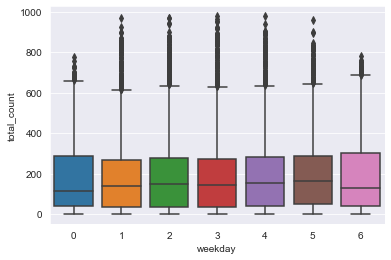

In [29]:
sns.boxplot(x="weekday", y="total_count", data=data)

<AxesSubplot:xlabel='holiday', ylabel='total_count'>

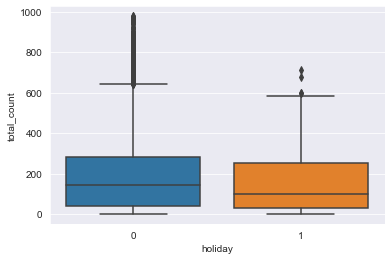

In [30]:
sns.boxplot(x="holiday", y="total_count", data=data)

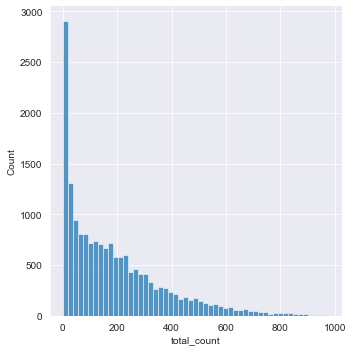

In [31]:
sns.displot(y);

In [32]:
X.head()

,season,month,hr,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [33]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: total_count, dtype: int64

In [34]:
X.shape

(17379, 13)

In [35]:
y.shape

(17379,)

## Spliting the dataset into train and test

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [37]:
X_train.shape

(13903, 13)

In [38]:
y_train.shape

(13903,)

In [39]:
X_test.shape

(3476, 13)

In [40]:
y_test.shape

(3476,)

# Creating a Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
linearRegModel = LinearRegression()
linearRegModel.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = linearRegModel.predict(X_test)

In [43]:
compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})  
compare

,Actual Values,Predicted Values
6557,374,374.0
11737,126,126.0
4952,24,24.0
2853,365,365.0
3697,90,90.0
...,...,...
2382,9,9.0
1173,56,56.0
9898,171,171.0
4684,13,13.0


In [44]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y_test,y_pred)

In [45]:
print("Results by manual calculation:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results by manual calculation:
MAE: 7.995707407767765e-14
MSE: 1.1568767214753073e-26
RMSE: 1.075582038468153e-13
R-Squared: 1.0


## Decison  Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor
DecisionregModel = DecisionTreeRegressor(max_depth=8)
DecisionregModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [47]:
d_y_pred = DecisionregModel.predict(X_test)

In [48]:
compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': d_y_pred})  
compare

,Actual Values,Predicted Values
6557,374,379.573529
11737,126,122.429907
4952,24,25.410000
2853,365,379.573529
3697,90,89.680851
...,...,...
2382,9,9.828571
1173,56,58.136364
9898,171,169.625899
4684,13,17.230769


In [49]:
mae_d = metrics.mean_absolute_error(y_test, d_y_pred)
mse_d = metrics.mean_squared_error(y_test, d_y_pred)
rmse_d = np.sqrt(mse)  
r2_d = metrics.r2_score(y_test,d_y_pred)

In [50]:
print("Results by manual calculation:")
print("MAE:",mae_d)
print("MSE:", mse_d)
print("RMSE:", rmse_d)
print("R-Squared:", r2_d)

Results by manual calculation:
MAE: 5.656182851273244
MSE: 81.49998322464694
RMSE: 1.075582038468153e-13
R-Squared: 0.9974786078305661


# Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
randomregModel = RandomForestRegressor(max_depth=10, n_estimators=100)
randomregModel.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [52]:
r_y_pred = DecisionregModel.predict(X_test)

In [53]:
compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': r_y_pred})  
compare

,Actual Values,Predicted Values
6557,374,379.573529
11737,126,122.429907
4952,24,25.410000
2853,365,379.573529
3697,90,89.680851
...,...,...
2382,9,9.828571
1173,56,58.136364
9898,171,169.625899
4684,13,17.230769


In [54]:
mae_r = metrics.mean_absolute_error(y_test, r_y_pred)
mse_r = metrics.mean_squared_error(y_test, r_y_pred)
rmse_r = np.sqrt(mse)  
r2_r = metrics.r2_score(y_test, r_y_pred)

In [55]:
print("Results by manual calculation:")
print("MAE:",mae_r)
print("MSE:", mse_r)
print("RMSE:", rmse_r)
print("R-Squared:", r2_r)

Results by manual calculation:
MAE: 5.656182851273244
MSE: 81.49998322464694
RMSE: 1.075582038468153e-13
R-Squared: 0.9974786078305661


## AdaBoost Regressor

In [56]:
from sklearn.ensemble import AdaBoostRegressor
adaregmodel= AdaBoostRegressor(n_estimators=100)
adaregmodel.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [57]:
ada_y_pred = adaregmodel.predict(X_test)

In [58]:
compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': ada_y_pred})  
compare

,Actual Values,Predicted Values
6557,374,393.864602
11737,126,168.822643
4952,24,48.303823
2853,365,393.864602
3697,90,111.169821
...,...,...
2382,9,48.303823
1173,56,72.962341
9898,171,204.204350
4684,13,48.303823


In [59]:
mae_ada = metrics.mean_absolute_error(y_test, ada_y_pred)
mse_ada = metrics.mean_squared_error(y_test, ada_y_pred)
rmse_ada = np.sqrt(mse)  
r2_ada = metrics.r2_score(y_test, ada_y_pred)

In [60]:
print("Results by manual calculation:")
print("MAE:",mae_ada)
print("MSE:", mse_ada)
print("RMSE:", rmse_ada)
print("R-Squared:", r2_ada)

Results by manual calculation:
MAE: 24.70661268921554
MSE: 831.6417404808612
RMSE: 1.075582038468153e-13
R-Squared: 0.9742712220388692
